# **Sentiment Classification - 50,000 movie reviews from IMDB**


**• DOMAIN:** Digital content and entertainment industry

**• CONTEXT:** The objective of this project is to build a text classification model that analyses the customer's
sentiments based on their reviews in the IMDB database. The model uses a complex deep learning model to build
an embedding layer followed by a classification algorithm to analyse the sentiment of the customers.

**• DATA DESCRIPTION:** The Dataset of 50,000 movie reviews from IMDB, labelled by sentiment (positive/negative).
Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For
convenience, the words are indexed by their frequency in the dataset, meaning the for that has index 1 is the most
frequent word. Use the first 20 words from each review to speed up training, using a max vocabulary size of
10,000. As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.

**• PROJECT OBJECTIVE:** To Build a sequential NLP classifier which can use input text parameters to determine the
customer sentiments.

In [ ]:
#Importing Necessary Packages.
import pandas as pd    # to load dataset
import numpy as np     # for mathematic equation
from matplotlib import pyplot
from nltk.corpus import stopwords   # to get collection of stopwords
from sklearn.model_selection import train_test_split       # for splitting dataset
from tensorflow.keras.preprocessing.text import Tokenizer  # to encode text to int
from tensorflow.keras.preprocessing.sequence import pad_sequences   # to do padding or truncating
from tensorflow.keras.models import Sequential     # the model
from tensorflow.keras.layers import Embedding, LSTM, Dense # layers of the architecture
from tensorflow.keras.callbacks import ModelCheckpoint   # save model
from tensorflow.keras.models import load_model   # load saved model
from keras.layers import Dense, Embedding, Conv1D, GlobalMaxPool1D, LSTM, TimeDistributed, Flatten
import re
import seaborn as sns
import tensorflow as tf

In [ ]:
#loading imdb data with most frequent 10000 words.

from keras.datasets import imdb
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
#Printing X Sample List
print(X_train)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

In [ ]:
#Printing the shape and seeing Y
print(X_train.shape)
print(X_test.shape)
print(y_train)
print(y_test)

(25000,)
(25000,)
[1 0 0 ... 0 1 0]
[0 1 1 ... 0 0 0]


In [ ]:
X_train_max_len = max(len(x) for x in X_train)
print("Max length of sequence in X_train: {}".format(X_train_max_len))

X_test_max_len = max(len(x) for x in X_test)
print("Max length of sequence in X_test:  {}".format(X_test_max_len))

Max length of sequence in X_train: 2494
Max length of sequence in X_test:  2315


#EDA

In [ ]:
#consolidating data for EDA
independent_var = np.concatenate((X_train, X_test), axis=0)
dependent_var = np.concatenate((y_train, y_test), axis=0)

In [ ]:
print("Categories:", np.unique(dependent_var))
print("Number of unique words:", len(np.unique(np.hstack(independent_var))))

Categories: [0 1]
Number of unique words: 9998


In [ ]:
length = [len(i) for i in independent_var]
print("Average Review length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))
# summarize size
# number of reviews
print("Number of reviews in x_train: {}".format(len(X_train)))
print("Number of reviews in x_test: {}".format(len(X_test)))
#print("Padded Training and Test data: ")
#print(len(X_train.shape))
#print(len(X_test.shape))
# number of words in each review
#print("Number of words in each review is {0}".format(X_train_padded[0].shape[0]))

Average Review length: 234.75892
Standard Deviation: 173
Number of reviews in x_train: 25000
Number of reviews in x_test: 25000


Review length: 
Mean 234.76 words (172.911495)


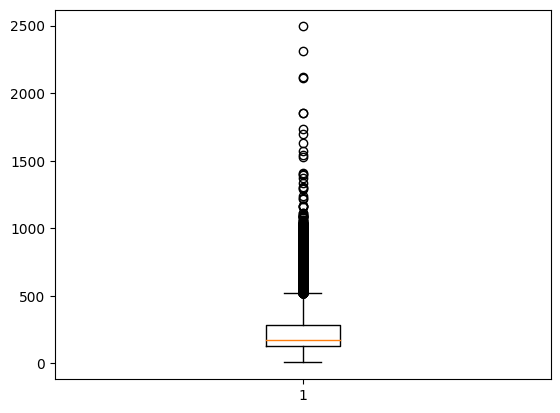

In [ ]:
# Summarize review length
print("Review length: ")
result = [len(x) for x in independent_var]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
# plot review length
pyplot.boxplot(result)
pyplot.show()

# we can see that max reviews are under the 500 characters mark

In [ ]:
#Padding Sequences
max_length = 350 ## considering the first 350 words of each review
independent_var = tf.keras.preprocessing.sequence.pad_sequences(independent_var,maxlen = max_length,padding = 'post', truncating='post')

Review length: 
Mean 350.00 words (0.000000)


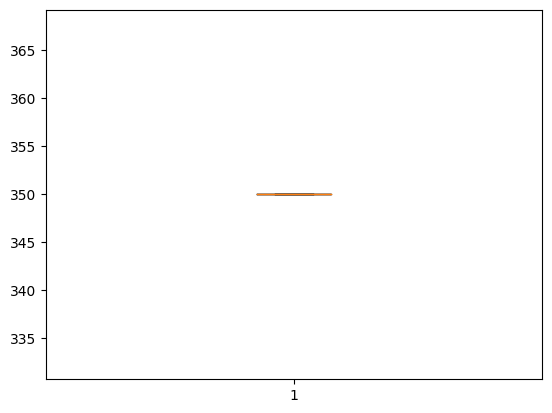

In [ ]:
# Summarize review length
print("Review length: ")
result = [len(x) for x in independent_var]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
# plot review length
pyplot.boxplot(result)
pyplot.show()

# The majority of reviews appear to be below the 500-character threshold.

In [ ]:
#Analysising a individual training sample
print("Categories:", dependent_var[0])
print("Text:", independent_var[0])

Categories: 1
Text: [   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224  

In [ ]:
length = [len(i) for i in independent_var]
print("Average Review length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))
# summarizing the size
# number of reviews
print("Number of reviews in x_train: {}".format(len(X_train)))
print("Number of reviews in x_test: {}".format(len(X_test)))

Average Review length: 350.0
Standard Deviation: 0
Number of reviews in x_train: 25000
Number of reviews in x_test: 25000


In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) ## mapping the index to its respective words
decoded = " ".join( [reverse_word_index.get(i - 3, "#") for i in independent_var[0]] )
print(decoded)
# indices are off by 3 because 0, 1, and 2 are reserverd indices for "padding", "Start of sequence" and "unknown"

1641221/1641221 [==============================] - 0s 0us/step
# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amaz

In [ ]:
dependent_var = np.array(dependent_var).astype("float32")
dependent_var[0]

1.0

<Axes: xlabel='label', ylabel='count'>

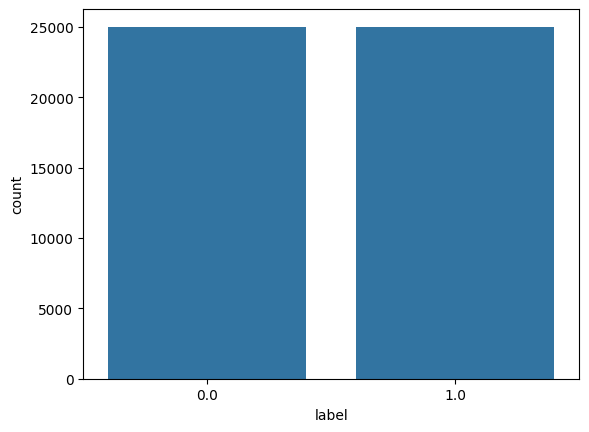

In [ ]:
#To plot for EDA
labelDF=pd.DataFrame({'label':dependent_var})
sns.countplot(x='label', data=labelDF)

The data exhibits an equal distribution of sentiments, reducing bias and enabling more balanced predictions for each category.

#Model Building

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(independent_var, dependent_var, test_size = 0.2)

print('Train Set')
print(X_train, '\n')
print(X_test, '\n')
print('Test Set')
print(y_train, '\n')
print(y_test)

Train Set
[[   1 1162   14 ...    0    0    0]
 [   1   13   66 ...    0    0    0]
 [   1   13   16 ...    0    0    0]
 ...
 [   1  121    4 ...    0    0    0]
 [   1    4 2026 ...    0    0    0]
 [   1   21  472 ...  131 1599 4158]] 

[[   1 9129  725 ...    0    0    0]
 [   1    2  241 ...   81   38   18]
 [   1   33  196 ...    0    0    0]
 ...
 [   1   15 5819 ...    0    0    0]
 [   1  207  115 ...  371    2 3995]
 [   1   61    2 ...    0    0    0]] 

Test Set
[0. 0. 1. ... 0. 0. 0.] 

[1. 0. 1. ... 1. 0. 1.]


In [ ]:
vocabulary = 10000
max_words = 350

model = Sequential()
model.add(Embedding(vocabulary, 100, input_length=max_words))
model.add(LSTM(100,return_sequences= True))
dense_layer = Dense(100, activation='relu')
model.add(TimeDistributed(dense_layer))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 350, 100)          1000000   
                                                                 
 lstm (LSTM)                 (None, 350, 100)          80400     
                                                                 
 time_distributed (TimeDist  (None, 350, 100)          10100     
 ributed)                                                        
                                                                 
 flatten (Flatten)           (None, 35000)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                 35001     
                                                                 
Total params: 1125501 (4.29 MB)
Trainable params: 1125501 (4.29 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [ ]:
model.fit(X_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
625/625 [==============================] - 465s 738ms/step - loss: 0.3327 - accuracy: 0.8522
Epoch 2/5
625/625 [==============================] - 430s 688ms/step - loss: 0.1974 - accuracy: 0.9242
Epoch 3/5
625/625 [==============================] - 431s 689ms/step - loss: 0.1432 - accuracy: 0.9456
Epoch 4/5
625/625 [==============================] - 436s 698ms/step - loss: 0.1012 - accuracy: 0.9628
Epoch 5/5
625/625 [==============================] - 430s 689ms/step - loss: 0.0653 - accuracy: 0.9761


In [ ]:
scores, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Score: {:.4f}".format(scores))
print("Accuracy: {:.4f}".format(accuracy))

Score: 0.4518
Accuracy: 0.8866


In [ ]:
imdb_wordindex = imdb.get_word_index()
index_from = 3
imdb_wordindex = {key:value + index_from for key, value in imdb_wordindex.items()}
imdb_wordindex['the']

4

In [ ]:
goodsample = "i liked the movie"
badsample = "i did not like this movie"
goodsample1 = "good acting"
badsample2 = "bad direction"

for review in [goodsample, badsample,goodsample1, badsample2]:
    encoded_review = []
    review_split = review.split(" ")
    for word in review_split:
        encoded_review.append(imdb_wordindex[word])
    review_padded = tf.keras.preprocessing.sequence.pad_sequences([encoded_review],maxlen = 350,padding = 'post', truncating='post')
    pred = model.predict(review_padded)
    if pred > 0.5:
        sentiment = 'positive'
    else:
        sentiment = 'negative'
    print("Review: {0}\n\tSentiment: {1}".format(review, sentiment))

1/1 [==============================] - 1s 567ms/step
Review: i liked the movie
	Sentiment: positive
1/1 [==============================] - 0s 71ms/step
Review: i did not like this movie
	Sentiment: negative
1/1 [==============================] - 0s 86ms/step
Review: good acting
	Sentiment: positive
1/1 [==============================] - 0s 84ms/step
Review: bad direction
	Sentiment: negative


The reported accuracy value of 88.66% indicates that the model correctly predicted the outcomes for nearly 88.66% of the instances in the dataset.